In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from src.longitudinal_ssms import TTC
from src.two_dimensional_ssms import TTC2D
from src.efficiency_utils import evaluate_efficiency

In [15]:
samples = pd.read_hdf('./assets/samples.h5', key='example')
print(samples)
SSMs = ['TTC', 'DRAC', 'MTTC', 'PSD', 'TTC2D', 'ACT', 'TAdv']

       track_id_i  track_id_j      time        x_i         y_i      vx_i  \
0           10009       10008   10000.1  10.437406  314.295499 -0.075939   
1           10009       10008   10000.2  10.439999  314.384635 -0.064166   
2           10009       10008   10000.3  10.430000  310.784416 -0.100047   
3           10009       10008   10000.4  10.429923  307.168712 -0.003033   
4           10009       10008   10000.5  10.429997  303.557658  0.000545   
...           ...         ...       ...        ...         ...       ...   
10012      100212      100213  100153.9  24.720120  398.716873 -0.094663   
10013      100212      100213  100154.0  24.719884  402.067647 -0.005044   
10014      100212      100213  100154.1  24.715060  405.427784 -0.047138   
10015      100212      100213  100154.2  24.710011  408.785013 -0.050343   
10016      100212      100213  100154.3  24.709379  411.858223 -0.012039   

            vy_i      hx_i      hy_i     acc_i  ...  width_i        x_j  \
0     -35.99

In [4]:
# Example use of TTC returning a dataframe
results = TTC(samples, toreturn='dataframe')
results[['TTC']].head()

,TTC
0,15.543152
1,15.579720
2,15.446758
3,15.344432
4,15.244114


Text(0, 0.5, 'Frequency')

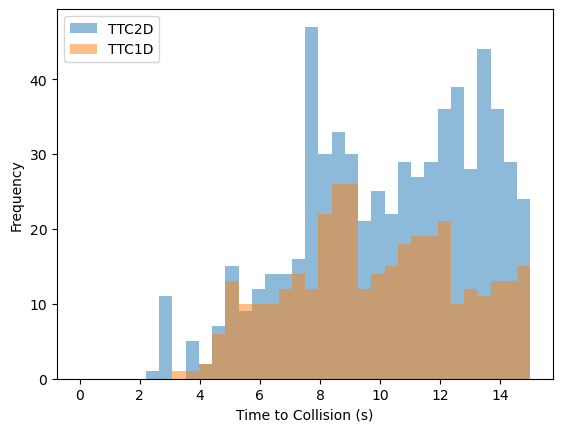

In [5]:
# Example use of TTC2D returning values
ttc2d_values = TTC2D(samples, toreturn='values')
_ = plt.hist(ttc2d_values, bins=np.linspace(0, 15, 35), alpha=0.5, label='TTC2D')
_ = plt.hist(results['TTC'], bins=np.linspace(0, 15, 35), alpha=0.5, label='TTC1D')
plt.legend()
plt.xlabel('Time to Collision (s)')
plt.ylabel('Frequency')

In [13]:
samples = samples.loc[:1e4-1] # extract 1e4 samples for testing
eval_results = {}
for ssm in SSMs:
    for num_pairs in [1e4, 1e5, 1e6]:
        num_pairs = int(num_pairs)
        num_repeat = int(num_pairs//len(samples))
        test_samples = pd.concat([samples]*num_repeat, ignore_index=True)
        avg_time, run_time = evaluate_efficiency(test_samples, ssm, 20, average_only=False)
        print(f'{ssm} with {num_pairs} pairs: {avg_time:.2f} seconds on average.')
        eval_results[(ssm, num_pairs)] = run_time

TTC with 10000 pairs: 0.04 seconds on average.
TTC with 100000 pairs: 0.37 seconds on average.
TTC with 1000000 pairs: 4.18 seconds on average.
DRAC with 10000 pairs: 0.04 seconds on average.
DRAC with 100000 pairs: 0.39 seconds on average.


Exception ignored in: <function tqdm.__del__ at 0x7331bc0a35f0>
Traceback (most recent call last):
  File "/home/liyunwei/.conda/envs/king/lib/python3.7/site-packages/tqdm/std.py", line 1152, in __del__
    self.close()
  File "/home/liyunwei/.conda/envs/king/lib/python3.7/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


DRAC with 1000000 pairs: 4.22 seconds on average.
MTTC with 10000 pairs: 0.05 seconds on average.
MTTC with 100000 pairs: 0.40 seconds on average.
MTTC with 1000000 pairs: 4.37 seconds on average.
PSD with 10000 pairs: 0.02 seconds on average.
PSD with 100000 pairs: 0.21 seconds on average.
PSD with 1000000 pairs: 2.18 seconds on average.
TTC2D with 10000 pairs: 0.01 seconds on average.
TTC2D with 100000 pairs: 0.10 seconds on average.
TTC2D with 1000000 pairs: 0.99 seconds on average.
ACT with 10000 pairs: 0.05 seconds on average.
ACT with 100000 pairs: 0.56 seconds on average.
ACT with 1000000 pairs: 6.45 seconds on average.
TAdv with 10000 pairs: 0.05 seconds on average.
TAdv with 100000 pairs: 0.53 seconds on average.
TAdv with 1000000 pairs: 6.36 seconds on average.


Exception ignored in: <function tqdm.__del__ at 0x7331bc0a35f0>
Traceback (most recent call last):
  File "/home/liyunwei/.conda/envs/king/lib/python3.7/site-packages/tqdm/std.py", line 1152, in __del__
    self.close()
  File "/home/liyunwei/.conda/envs/king/lib/python3.7/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x7331bc0a35f0>
Traceback (most recent call last):
  File "/home/liyunwei/.conda/envs/king/lib/python3.7/site-packages/tqdm/std.py", line 1152, in __del__
    self.close()
  File "/home/liyunwei/.conda/envs/king/lib/python3.7/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


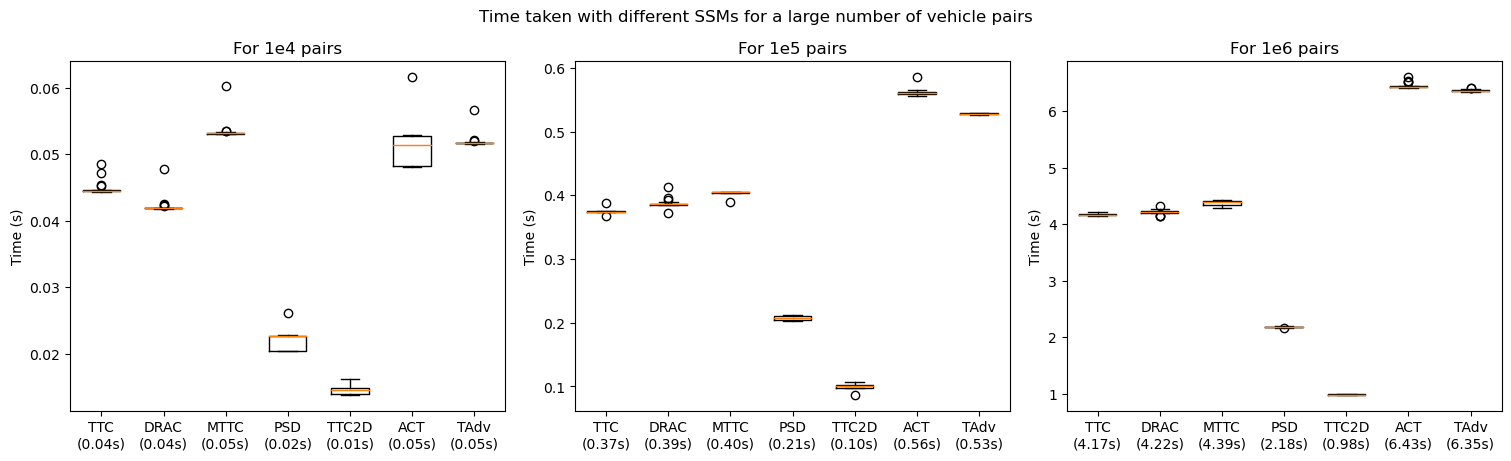

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4.5), constrained_layout=True, gridspec_kw={'wspace': 0.05})
fig.suptitle('Time taken with different SSMs for a large number of vehicle pairs')
for axid, num_pairs in enumerate([1e4, 1e5, 1e6]):
    ax = axes[axid]
    ax.set_title(f'For 1e{int(np.log10(num_pairs))} pairs')
    num_pairs = int(num_pairs)
    for pos, ssm in enumerate(SSMs):
        data = eval_results[(ssm, num_pairs)]
        ax.boxplot(data, positions=[pos], showfliers=True, widths=0.6)
    xlabels = [f'{ssm}\n({np.median(eval_results[(ssm, num_pairs)]):.2f}s)' for ssm in SSMs]
    ax.set_xticks(list(range(len(SSMs))))
    ax.set_xticklabels(xlabels)
    ax.set_ylabel('Time (s)')

In [ ]:
fig.savefig('./assets/efficiency_comparison.svg', dpi=400, bbox_inches='tight')